# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_elh.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities[0:5]

['lagoa', 'qaanaaq', 'illoqqortoormiut', 'nome', 'faya']

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=df28987fa9fb65e0f5c48f1f4457af7f&units=metric&q='

In [5]:
# Create empty lists to store the data for each field
city_name_list = []
countries = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:            
        city_name = response_json['name']
        country = response_json['sys']['country']
        lng = response_json['coord']['lon']
        lat = response_json['coord']['lat']
        temp = response_json['main']['temp']
        humidity = response_json['main']['humidity']
        clouds = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']        
        date = response_json["dt"]
        
        city_name_list.append(city_name)
        countries.append(country)
        lng_list.append(lng)
        lat_list.append(lat)
        temp_list.append(temp)
        humidity_list.append(humidity)
        clouds_list.append(clouds)
        wind_speed_list.append(wind_speed)
        date_list.append(date)

    
        print(city)
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("Missing data.. will not include in data")

lagoa
qaanaaq
Missing data.. will not include in data
nome
faya
albany
new norfolk
chapais
paso de los toros
bluff
san patricio
cape town
port macquarie
busselton
rikitea
kapaa
dole
magadan
ribeira grande
burnie
ushuaia
pevek
saint-philippe
ponta do sol
cap malheureux
east london
avarua
belyy yar
rio muerto
port alfred
atuona
fairbanks
dahuk
castro
victoria
torbay
terme
birao
barrow
palin
butaritari
port moresby
ahipara
dikson
mantua
Missing data.. will not include in data
punta arenas
makakilo city
indianola
Missing data.. will not include in data
geraldton
hilo
hobart
hermanus
Missing data.. will not include in data
cabo san lucas
hithadhoo
rawson
cherskiy
bethel
mahebourg
agucadoura
padang
Missing data.. will not include in data
Missing data.. will not include in data
kaitangata
voh
mar del plata
acapulco
bardiyah
algeciras
abu kamal
leningradskiy
galesong
tiksi
ishigaki
mataura
khilok
Missing data.. will not include in data
khatanga
hofn
carnarvon
artyom
norman wells
grand-lahou
ch

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name_list, 
    "Country": countries, 
    "Lat": lat_list, 
    "Lng": lng_list,
    "Temperature": temp_list, 
    "Humidity": humidity_list, 
    "Clouds": clouds_list,
    "Wind_Speed": wind_speed_list,
    "date": date_list}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date
0,Lagoa,PT,39.0500,-27.9833,20.37,75,100,7.54,1630898843
1,Qaanaaq,GL,77.4840,-69.3632,-7.47,86,98,0.94,1630898844
2,Nome,US,64.5011,-165.4064,8.04,87,90,3.09,1630898844
3,Faya,SA,18.3851,42.4509,15.29,47,9,0.96,1630898844
4,Albany,US,42.6001,-73.9662,17.95,93,100,1.34,1630898681
...,...,...,...,...,...,...,...,...,...
565,Manzhouli,CN,49.6000,117.4333,13.84,48,100,3.61,1630898936
566,Ankazoabo,MG,-22.2833,44.5167,17.26,66,0,2.56,1630899063
567,Merrill,US,45.1805,-89.6835,13.40,87,40,0.00,1630899064
568,Brazzaville,CG,-4.2658,15.2832,24.20,73,75,2.06,1630898791


In [7]:
weather_data.describe()

,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.021166,19.625490,19.261228,70.908772,53.935088,3.435930,1.630899e+09
std,32.859968,90.946668,7.844778,21.379377,40.275907,2.455657,9.066059e+01
min,-54.800000,-179.166700,-7.470000,10.000000,0.000000,0.000000,1.630898e+09
25%,-7.220275,-61.223875,13.730000,59.250000,7.250000,1.540000,1.630899e+09
50%,20.959550,20.359000,20.120000,76.000000,64.000000,2.980000,1.630899e+09
75%,45.471725,102.444925,25.535000,87.000000,97.000000,4.877500,1.630899e+09
max,78.218600,179.316700,35.780000,100.000000,100.000000,13.420000,1.630899e+09


In [8]:
# Export to .csv file
weather_data.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
mask = weather_data.Humidity > 100
weather_data.loc[mask]

,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

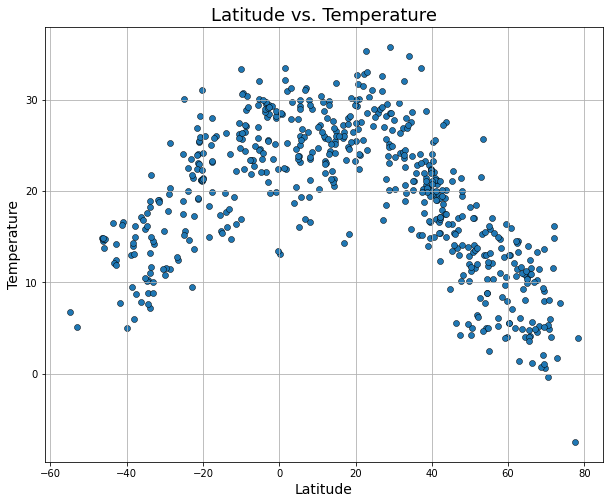

In [12]:

plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Temperature", data=weather_data, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Latitude vs. Temperature", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Temperature", size=14)
# plt.tight_layout()
plt.savefig("output_data/Latitude_vs_Temp.png")

## Latitude vs. Humidity Plot

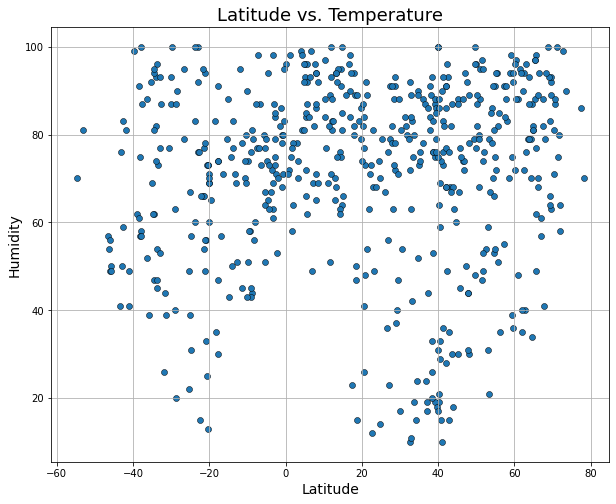

In [13]:
plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Humidity", data=weather_data, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Latitude vs. Temperature", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Humidity", size=14)
# plt.tight_layout()
plt.savefig("output_data/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

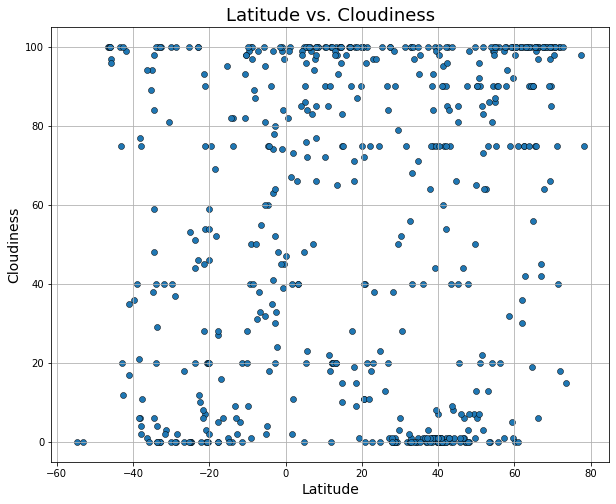

In [14]:
plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Clouds", data=weather_data, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Latitude vs. Cloudiness", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Cloudiness", size=14)
# plt.tight_layout()
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

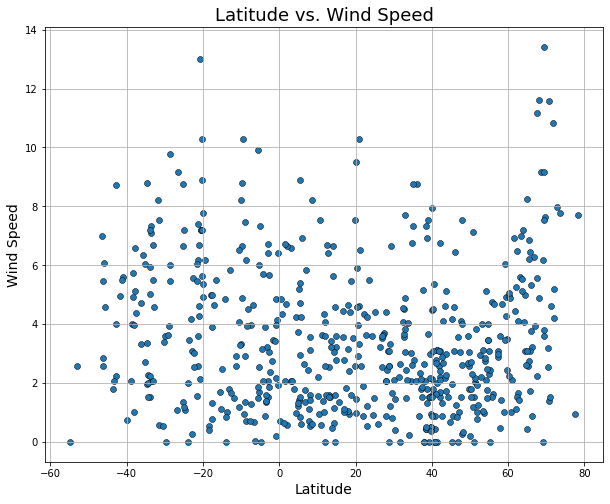

In [15]:
plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Wind_Speed", data=weather_data, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Latitude vs. Wind Speed", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Wind Speed", size=14)
# plt.tight_layout()
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")

## Linear Regression

In [16]:
corrs = weather_data.corr()
corrs

,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date
Lat,1.000000,-0.150109,-0.332412,0.073106,0.142016,-0.072963,0.088349
Lng,-0.150109,1.000000,0.118677,-0.293095,0.052425,0.332591,0.116178
Temperature,-0.332412,0.118677,1.000000,-0.268324,-0.153451,-0.016128,0.049244
Humidity,0.073106,-0.293095,-0.268324,1.000000,0.414353,-0.086786,-0.080808
Clouds,0.142016,0.052425,-0.153451,0.414353,1.000000,0.067584,0.013767
Wind_Speed,-0.072963,0.332591,-0.016128,-0.086786,0.067584,1.000000,0.004986
date,0.088349,0.116178,0.049244,-0.080808,0.013767,0.004986,1.000000


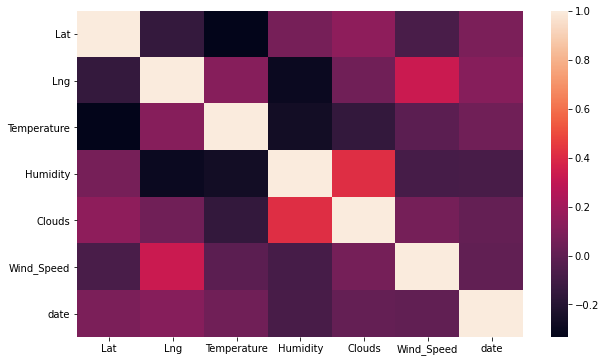

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [19]:
northern_hemisphere.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 569
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         389 non-null    object 
 1   Country      389 non-null    object 
 2   Lat          389 non-null    float64
 3   Lng          389 non-null    float64
 4   Temperature  389 non-null    float64
 5   Humidity     389 non-null    int64  
 6   Clouds       389 non-null    int64  
 7   Wind_Speed   389 non-null    float64
 8   date         389 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 30.4+ KB


In [20]:
southern_hemisphere.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 5 to 568
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         181 non-null    object 
 1   Country      181 non-null    object 
 2   Lat          181 non-null    float64
 3   Lng          181 non-null    float64
 4   Temperature  181 non-null    float64
 5   Humidity     181 non-null    int64  
 6   Clouds       181 non-null    int64  
 7   Wind_Speed   181 non-null    float64
 8   date         181 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.1+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature')

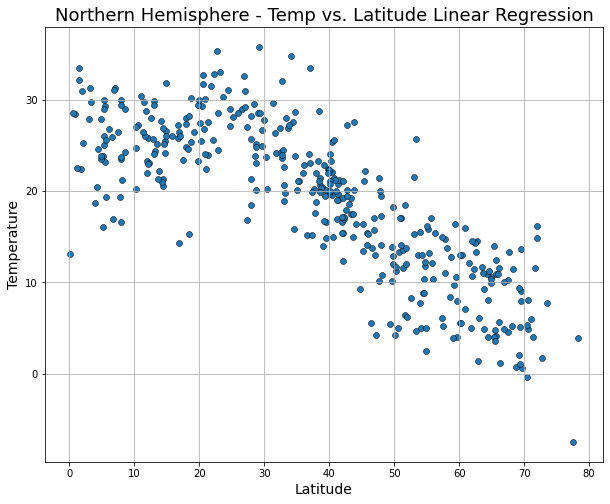

In [21]:
plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Temperature", data=northern_hemisphere, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Temperature", size=14)
# plt.tight_layout()
# plt.savefig("output_data/Northern_Lat_Temp_Regression.png")

In [22]:
northern_hemisphere.corr() 

,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date
Lat,1.000000,0.004533,-0.800019,-0.034615,0.046614,0.173583,-0.018695
Lng,0.004533,1.000000,0.040641,-0.207706,0.085753,0.294725,0.181168
Temperature,-0.800019,0.040641,1.000000,-0.274954,-0.216663,-0.115898,0.025132
Humidity,-0.034615,-0.207706,-0.274954,1.000000,0.467697,0.014461,-0.095484
Clouds,0.046614,0.085753,-0.216663,0.467697,1.000000,0.176466,0.018179
Wind_Speed,0.173583,0.294725,-0.115898,0.014461,0.176466,1.000000,0.035239
date,-0.018695,0.181168,0.025132,-0.095484,0.018179,0.035239,1.000000


<AxesSubplot:>

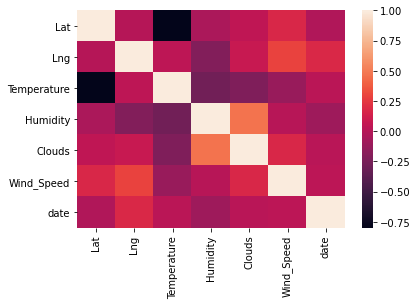

In [23]:
 sns.heatmap(northern_hemisphere.corr())

In [24]:
feature = northern_hemisphere[["Lat"]]
target = northern_hemisphere["Temperature"]

In [25]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     688.1
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.94e-88
Time:                        22:36:00   Log-Likelihood:                -1177.1
No. Observations:                 389   AIC:                             2358.
Df Residuals:                     387   BIC:                             2366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2554      0.536     58.317      0.000      30.202      32.309
Lat           -0.3295      0.013    -26.231      0.000      -0.354      -0.305
==============================================================================
Omnibus:                        5.031   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.219
Skew:                          -0.186   Prob(JB):                       0.0736
Kurtosis:                       3.429   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.mse_resid

The r-squared is: 0.6400302585334596


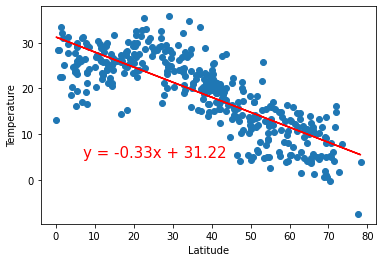

In [26]:
# make plot
plt.scatter(northern_hemisphere.Lat, northern_hemisphere.Temperature)

plt.plot(northern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = -0.33x + 31.22", (7,5), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature')

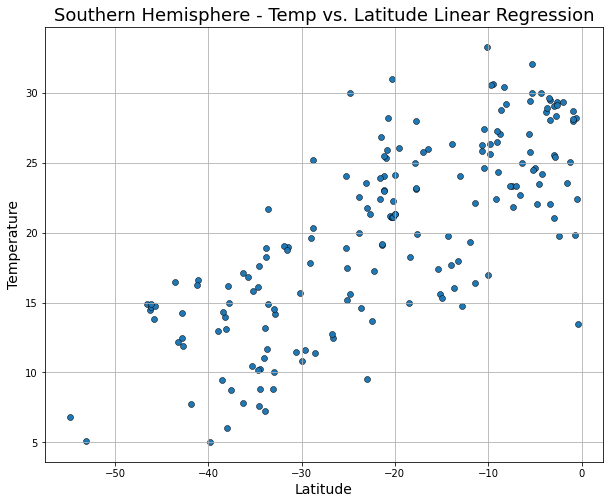

In [27]:
plt.figure(figsize = (10,8))
a=sns.scatterplot(x='Lat', y="Temperature", data=southern_hemisphere, palette = "nipy_spectral", edgecolor="black")
a.yaxis.grid(True) # Hide the horizontal gridlines
a.xaxis.grid(True) # Show the vertical gridlines
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression", size=18)
plt.xlabel("Latitude", size=14)
plt.ylabel("Temperature", size=14)
# plt.tight_layout()
# plt.savefig("output_data/Northern_Lat_Temp_Regression.png")

In [28]:
southern_hemisphere.corr() 

,Lat,Lng,Temperature,Humidity,Clouds,Wind_Speed,date
Lat,1.000000,-0.047222,0.756882,0.135673,0.101403,-0.111186,0.149176
Lng,-0.047222,1.000000,0.278414,-0.466508,0.060395,0.349221,0.052009
Temperature,0.756882,0.278414,1.000000,-0.227841,0.063379,0.185487,0.133686
Humidity,0.135673,-0.466508,-0.227841,1.000000,0.242896,-0.280588,-0.077947
Clouds,0.101403,0.060395,0.063379,0.242896,1.000000,-0.092921,-0.032450
Wind_Speed,-0.111186,0.349221,0.185487,-0.280588,-0.092921,1.000000,-0.008918
date,0.149176,0.052009,0.133686,-0.077947,-0.032450,-0.008918,1.000000


<AxesSubplot:>

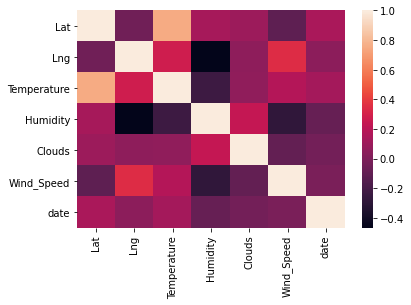

In [29]:
 sns.heatmap(southern_hemisphere.corr())

In [30]:
feature1 = southern_hemisphere[["Lat"]]
target1 = southern_hemisphere["Temperature"]

In [31]:
 # STATSMODELS
X = sm.add_constant(feature1)
Y = target1

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.75e-35
Time:                        22:36:58   Log-Likelihood:                -522.09
No. Observations:                 181   AIC:                             1048.
Df Residuals:                     179   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7824      0.592     46.940      0.000      26.614      28.950
Lat            0.3677      0.024     15.494      0.000       0.321       0.415
==============================================================================
Omnibus:                        2.375   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.404
Skew:                          -0.272   Prob(JB):                        0.301
Kurtosis:                       2.848   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results.mse_resid

18.957628897717687

The r-squared is: 0.5728704021951305


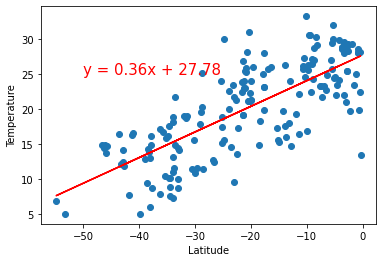

In [33]:
# make plot
plt.scatter(southern_hemisphere.Lat, southern_hemisphere.Temperature)

plt.plot(southern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = 0.36x + 27.78", (-50,25), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [34]:
feature2 = northern_hemisphere[["Lat"]]
target2 = northern_hemisphere["Humidity"]

In [35]:
 # STATSMODELS
X = sm.add_constant(feature2)
Y = target2

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4643
Date:                Sun, 05 Sep 2021   Prob (F-statistic):              0.496
Time:                        22:37:30   Log-Likelihood:                -1759.7
No. Observations:                 389   AIC:                             3523.
Df Residuals:                     387   BIC:                             3531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.6211      2.396     30.722      0.000      68.910      78.333
Lat           -0.0383      0.056     -0.681      0.496      -0.149       0.072
==============================================================================
Omnibus:                       59.814   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.986
Skew:                          -1.119   Prob(JB):                     5.79e-19
Kurtosis:                       3.415   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
results.mse_resid

499.90686735454847

The r-squared is: 0.00119818383246173


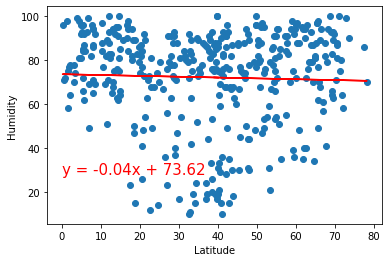

In [39]:
# make plot
plt.scatter(northern_hemisphere.Lat, northern_hemisphere.Humidity)

plt.plot(northern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = -0.04x + 73.62", (0,28), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [40]:
feature3 = southern_hemisphere[["Lat"]]
target3 = southern_hemisphere["Humidity"]

In [41]:
 # STATSMODELS
X = sm.add_constant(feature3)
Y = target3

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.357
Date:                Sun, 05 Sep 2021   Prob (F-statistic):             0.0686
Time:                        22:38:32   Log-Likelihood:                -786.77
No. Observations:                 181   AIC:                             1578.
Df Residuals:                     179   BIC:                             1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.0897      2.554     28.221      0.000      67.049      77.130
Lat            0.1877      0.102      1.832      0.069      -0.014       0.390
==============================================================================
Omnibus:                        5.833   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.870
Skew:                          -0.440   Prob(JB):                       0.0531
Kurtosis:                       2.949   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
results.mse_resid

353.1194754749408

The r-squared is: 0.018407152727755283


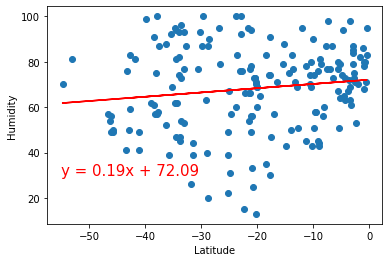

In [45]:
# make plot
plt.scatter(southern_hemisphere.Lat, southern_hemisphere.Humidity)

plt.plot(southern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = 0.19x + 72.09", (-55,30), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
feature4 = northern_hemisphere[["Lat"]]
target4 = northern_hemisphere["Clouds"]

In [47]:
 # STATSMODELS
X = sm.add_constant(feature4)
Y = target4

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Clouds   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8427
Date:                Sun, 05 Sep 2021   Prob (F-statistic):              0.359
Time:                        22:39:31   Log-Likelihood:                -1995.7
No. Observations:                 389   AIC:                             3995.
Df Residuals:                     387   BIC:                             4003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0103      4.396     12.287      0.000      45.368      62.653
Lat            0.0946      0.103      0.918      0.359      -0.108       0.297
==============================================================================
Omnibus:                     2740.207   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.662
Skew:                          -0.356   Prob(JB):                     1.64e-11
Kurtosis:                       1.401   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
results.mse_resid

1682.0466357764751

The r-squared is: 0.002172894640698919


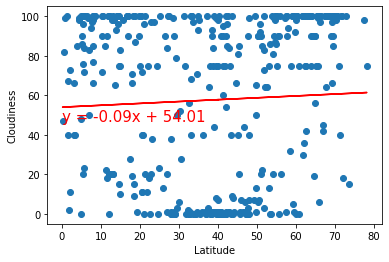

In [49]:
# make plot
plt.scatter(northern_hemisphere.Lat, northern_hemisphere.Clouds)

plt.plot(northern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = -0.09x + 54.01", (0,47), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [50]:
feature3 = southern_hemisphere[["Lat"]]
target3 = southern_hemisphere["Clouds"]

In [51]:
 # STATSMODELS
X = sm.add_constant(feature3)
Y = target3

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Clouds   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.860
Date:                Sun, 05 Sep 2021   Prob (F-statistic):              0.174
Time:                        22:40:05   Log-Likelihood:                -911.88
No. Observations:                 181   AIC:                             1828.
Df Residuals:                     179   BIC:                             1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.9547      5.099     10.189      0.000      41.893      62.017
Lat            0.2788      0.204      1.364      0.174      -0.125       0.682
==============================================================================
Omnibus:                      492.199   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.354
Skew:                           0.258   Prob(JB):                     0.000170
Kurtosis:                       1.574   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results.mse_resid

1407.0952197741847

The r-squared is: 0.010282549657538276


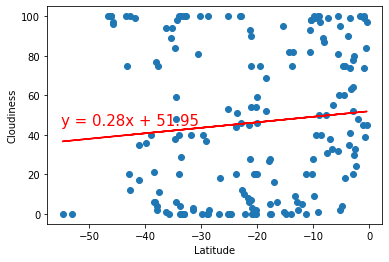

In [54]:
# make plot
plt.scatter(southern_hemisphere.Lat, southern_hemisphere.Clouds)

plt.plot(southern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = 0.28x + 51.95", (-55,45), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [55]:
feature4 = northern_hemisphere[["Lat"]]
target4 = northern_hemisphere["Wind_Speed"]

In [56]:
 # STATSMODELS
X = sm.add_constant(feature4)
Y = target4

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind_Speed   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.02
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           0.000584
Time:                        22:41:06   Log-Likelihood:                -876.83
No. Observations:                 389   AIC:                             1758.
Df Residuals:                     387   BIC:                             1766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4230      0.248      9.782      0.000       1.936       2.910
Lat            0.0201      0.006      3.467      0.001       0.009       0.032
==============================================================================
Omnibus:                       67.084   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.524
Skew:                           1.089   Prob(JB):                     9.00e-23
Kurtosis:                       4.231   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results.mse_resid

5.341032590533371

The r-squared is: 0.03013119601083447


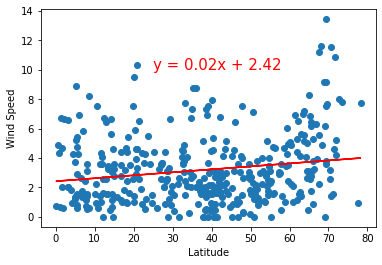

In [59]:
# make plot
plt.scatter(northern_hemisphere.Lat, northern_hemisphere.Wind_Speed)

plt.plot(northern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = 0.02x + 2.42", (25,10), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {results.rsquared}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [60]:
feature5 = southern_hemisphere[["Lat"]]
target5 = southern_hemisphere["Wind_Speed"]

In [61]:
 # STATSMODELS
X = sm.add_constant(feature5)
Y = target5

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind_Speed   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.241
Date:                Sun, 05 Sep 2021   Prob (F-statistic):              0.136
Time:                        22:41:37   Log-Likelihood:                -428.36
No. Observations:                 181   AIC:                             860.7
Df Residuals:                     179   BIC:                             867.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5446      0.353     10.052      0.000       2.849       4.240
Lat           -0.0212      0.014     -1.497      0.136      -0.049       0.007
==============================================================================
Omnibus:                        9.461   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.026
Skew:                           0.575   Prob(JB):                      0.00665
Kurtosis:                       2.921   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
results.mse_resid

6.729188633252663

The r-squared is: 0.012362321823668365


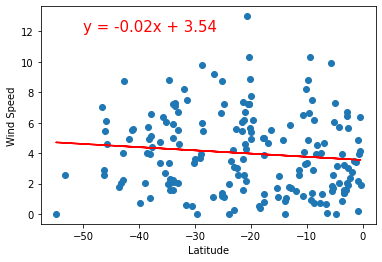

In [64]:
# make plot
plt.scatter(southern_hemisphere.Lat, southern_hemisphere.Wind_Speed)

plt.plot(southern_hemisphere.Lat, results.fittedvalues, "r-")

plt.annotate("y = -0.02x + 3.54", (-50,12), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {results.rsquared}")
plt.show()